<style> html {font-size:12} </style>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


# 1.- Regresión Lineal ordinaria
<span style="font-size:12pt"> a)

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode'],axis=1,inplace=True)
df.head()

#IMPORTANTE DESCOMENTAR ESTO PARA TESTEAR LA PREGUNTA 1F
#del df["sqft_above"]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<span style="font-size:12pt"> Debido a que lo que se quiere estudiar es el precio de las casas los atributos de id, fecha y código postal son irrelevantes, entonces se eliminan estas caracteristicas del dataset con la línea 4.
Notar que la fecha y ubicación puede influr, pero en este caso todas las casa están en la misma locación y se venden en un corto periodo de tiempo (1 año).</span>

<span style="font-size:12pt"> b)

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<span style="font-size:12pt">Son 21613 entradas de datos, estas entradas tienen 18 atributos (precio, dormitorios, baños, etc) no nulos. Hay detalles estadisticos sobre el conjunto de muestra por atributo en la tabla que se muestra arriba con el metodo `.describe()`</span>

<span style="font-size:12pt">c) </span>

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

"""
plt.figure(figsize = (16, 5))
plt.hist(df_scaled['price'], bins = 10)
plt.show()
"""

df_scaled['price'] = np.log(df['price'])
df_scaled.head()
df_scaled.describe()

"""
plt.figure(figsize = (16, 5))
plt.hist(df_scaled['price'], bins = 10)
plt.show()
"""


"\nplt.figure(figsize = (16, 5))\nplt.hist(df_scaled['price'], bins = 10)\nplt.show()\n"

<span style="font-size:12pt">
En las mediciones se midieron 18 atributos distintos, en diferentes escalas, dinero, cantidad de piezas, baños, etc. Entonces para dejar todas las cantidades en la misma escala es necesario realizar la estandarización. <br>
Al ver el histograma del precio después de estandarizar se aprecia que la gran mayoria de los datos se concetra al inicio (pegados al eje y), entonces es necesario realizar una transformación para que los datos se repartan de mejor manera a lo largo del eje. Se observa que los datos presentan un comportamiento exponencial decreciente, entonces se aplica el logaritmo para que así estos se puedan diferenciar unos de otros.<br><br>
d)
</span>

In [5]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #Gran matriz X que le quite el atributo del precio
#use .ix instead, in older pandas version
N = X.shape[0]#Cantidad de filas
X.insert(X.shape[1], 'intercept', np.ones(N))#Pega una columna de 1's
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

<span style="font-size:12pt">
El modelo de regresión lineal es
$$ y = \beta_0 + \sum_{j=1}^{p} \beta_j x_j  $$
Se puede meter el termino $\beta_0$ dentro del vector $\beta$ si es que al final de cada muestra (matriz $X$) se añade un 1, entonces al momento de resolver el sistema $X \cdot \beta = Y$, dentro del vector $\beta$ la última fila será el $\beta_0$.<br>
Lo que hace la linea 4 es exactamente añadir una columna de 1's a la matriz $X$.<br>
<br>
Los parámetros usados en la regresión lineal<br>
Para la función `lm.LinearRegression()`<br>
* fit_intercept = False. Sirve para ver si se va a calcular o no el intercepto, por defaul True<br>
* normalize = Se ignora si fit_intercept es False. Si es True la data X va a ser normalizada<br>
* copy_X = Boleano que dice si las operaciones serán o no inplace (default True)<br>
* n_jobs = los jobs usados para el procesamiento (default True)<br>

<span style="font-size:12pt">
Para el método `fit()`<br>
* X = La matriz $X$
* y = El vector y de soluciones conocidas para el input $X$
</span>

<span style="font-size:12pt">
e)

In [6]:
pesos = linreg.coef_ #el vector beta

yEstimado = linreg.predict(Xtest)
yReal = np.array(ytest)

#Procedo a estimar la desviación estandar
std = np.sqrt(sum(map(lambda x: x**2, (yReal - yEstimado)))) / (len(yReal) - len(pesos))

#Procedo a sacar la diagonal de la pseudo matriz de covarianzas
MatrizXTX = np.dot(np.asarray(Xtrain).T , np.asarray(Xtrain))

V = np.linalg.inv(MatrizXTX).diagonal()
valoresPropios = np.linalg.eigvals(MatrizXTX)
print("Los valores propios son\n", valoresPropios)

zScore = list()
for i in range(len(pesos)):
    zScore.append(pesos[i] / (std * np.sqrt( V[i] )))
    
a = list(df)[1:]
a.append("origen")

respuesta = [("Atributo", a ),("Peso", pesos) , ("Z-Score", zScore), ("Diagonal", V)]
display(pd.DataFrame.from_items(respuesta))

Los valores propios son
 [  7.60216839e+04   3.12492543e+04   2.73713285e+04   1.97938266e+04
   1.72108891e+04   1.51500524e+04   1.49113282e+04   1.33015124e+04
   1.11256313e+04   9.85673850e+03   8.04829291e+03   7.65992255e+03
   5.00239793e+03   4.40471585e+03   2.85802165e+03   3.29851598e+03
   3.60591045e+03  -2.29675177e-12]


/home/fco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


,Atributo,Peso,Z-Score,Diagonal
0,bedrooms,-0.008270,-242.397340,1.150082e-04
1,bathrooms,0.055960,1170.892620,2.256855e-04
2,sqft_living,0.057769,NaN,-8.361319e+10
3,sqft_lot,0.022159,606.975226,1.316933e-04
4,floors,0.037595,980.260271,1.453297e-04
5,waterfront,0.033526,1181.251812,7.959289e-05
6,view,0.042082,1389.370047,9.064686e-05
7,condition,0.045277,1640.717920,7.524352e-05
8,grade,0.186212,3840.241758,2.323199e-04
9,sqft_above,0.047130,NaN,-6.797175e+10


<span style="font-size:12pt">
El z-score se calcula como $$\textit{z-score} = \frac{\hat{\beta_j}}{\hat{\sigma} \cdot \sqrt{\upsilon_{jj}}}$$
<span style="font-size:12pt">
Donde $\hat{\beta_j}$ corresponden a los pesos del atributo j, $\hat{\sigma}$ es la desviación estandar calculada de la forma $$\hat{\sigma} = \frac{\sqrt{ \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2}} {n - d - 1}$$
<span style="font-size:12pt">
y $\upsilon_{jj}$ corresponde a la diagonal de la pseudo matriz de covarianzas (le faltaría el $\frac{1}{n}$), es decir $$\upsilon_{jj} = (X^{T} \cdot X)^{-1} _{jj}$$
Entonces así se obtuvo la tabla de arriba.
<span style="font-size:12pt">
Se observa que 3 de los valores del z-score dan NaN, esto ocurre dado que algunos $\upsilon_{jj}$ son negativos. Esto se produce ya que la Matriz $X^{T} \cdot X$ esta al borde de ser singular dado que uno de sus valores propios está muy cerca del 0 (-2.29675177e-12), entonces al momento de sacar la inversa se generan esos $\upsilon_{jj}$ negativos.
<span style="font-size:12pt">
Notar que si uno de los valores propios está muy cerca del 0 eso significa que alguno o alguno(s) atributos son linealmente dependientes.


<span style="font-size:12pt">
f)

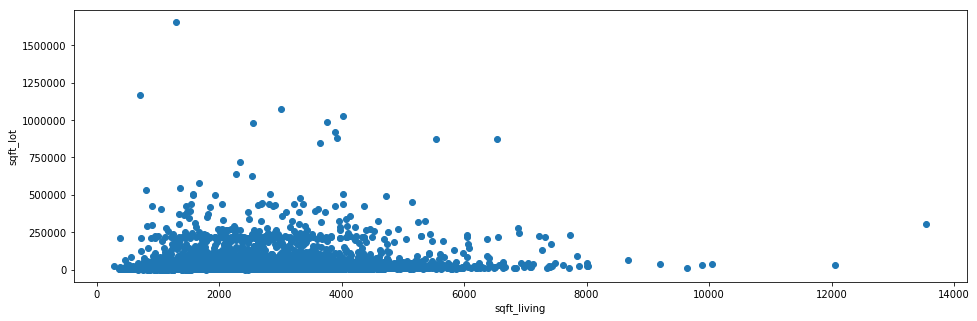

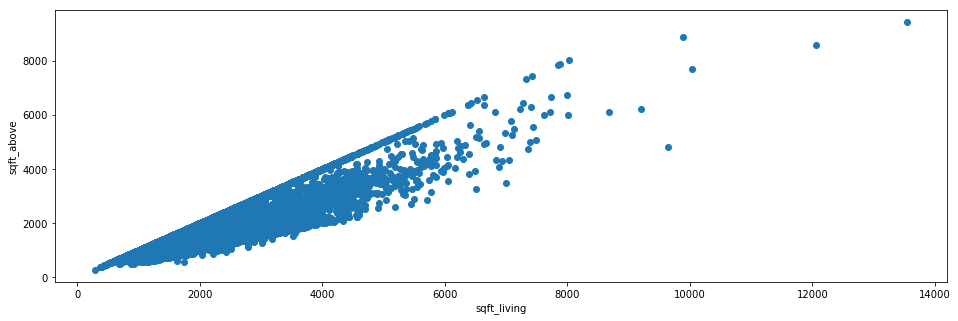

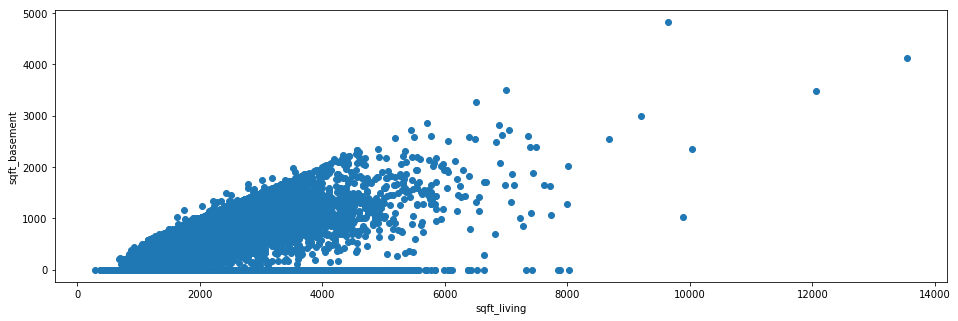

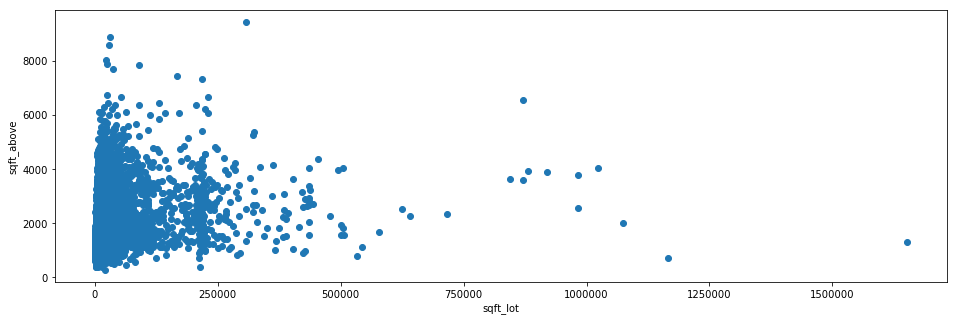

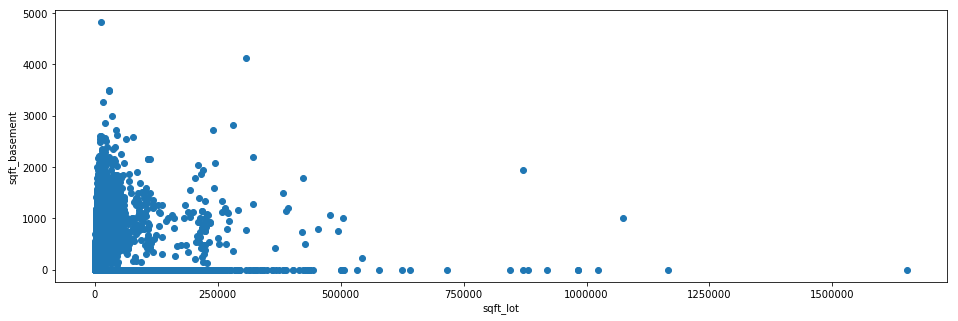

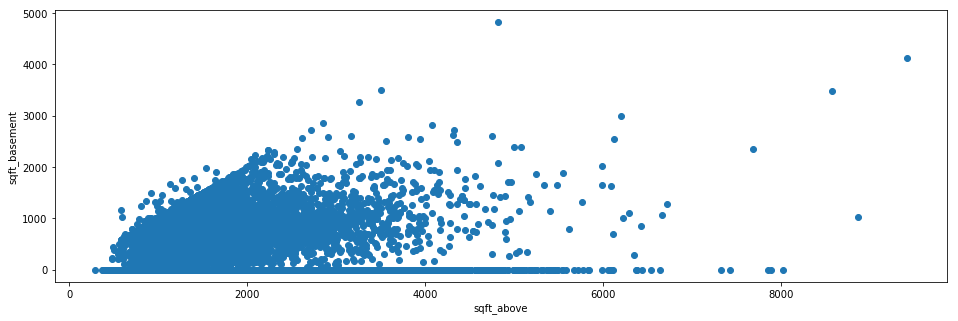

In [7]:
sospechosos = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]

for i in range(len(sospechosos)):
    
    for j in range(len(sospechosos)):
        if i<j:
            x = np.asarray(df[sospechosos[i]])
            y = np.asarray(df[sospechosos[j]])
            plt.figure(figsize = (16, 5))
            plt.scatter(x, y)            
            plt.xlabel(sospechosos[i])
            plt.ylabel(sospechosos[j])
            plt.show()

<span style="font-size:12pt">
Al ver que que uno de los valores propios era cercano a 0 (-2.29675177e-12) se decide arbitrariamente gráficar atributos para ver ver si es que existe alguno que sea combinación lineal de otro, como se ven en los gráficos de arriba el atributo sqft_living y sqft_above parecieran estar relacionados, entonces se decide eliminar(arbitrariamente) el atributo sqft_above puesto que no añadiría nueva información, una vez hecho esto se aprecian que ya no existen z-score definidos como NaN<br>
NOTA: ir al primer cubo de código y descomentar la linea `df["sqft_above"]` y corra todo el notebook denuevo para apreciar los cambios y después vuelva a comentar dicha linea y corra el notebook denuevo para que así se pueda ejecutar el resto el código.

# 2 Selección de atributos

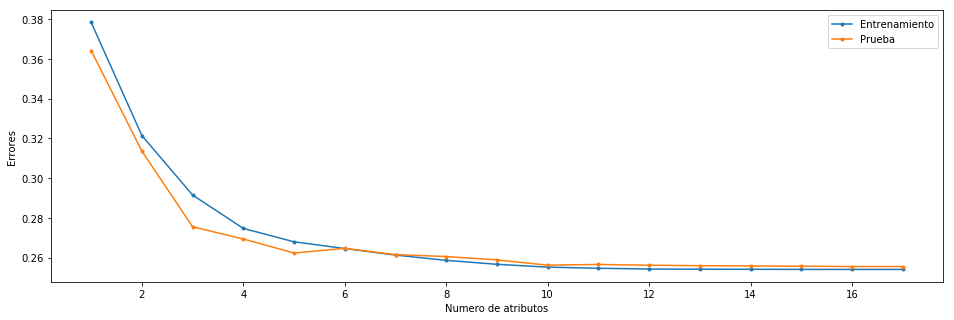

[17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 9, 16, 14, 10]

In [8]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1 #numero de columnas - 1
    k = min(p, k) #cantidad maxima de atributos
    names_x = np.array(names_x) 
    remaining = [i for i in range(0, p)] #lista de 0 a 16 considerando los 17 primeros
    selected = [p] #parto seleccionando el intercepto
    current_score = best_new_score = 0.0
    ejeX = [i for i in range(1,p+1)]
    erroresEntrenamiento = list()
    erroresPrueba = list()
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            
            x_test = Xtest.as_matrix()[:,indexes]
            y_test = ytest.as_matrix()
            
            modeloEntrenado = model.fit(x_train, y)
            predictions_train = modeloEntrenado.predict(x_train)
            residuals_train = predictions_train - y
            
            residuoTest = modeloEntrenado.predict(x_test) - y_test
            rmse_test = np.sqrt(sum(np.power(residuoTest, 2)) * (1.0/len(residuoTest)))
            
            #mse_candidate = np.mean(np.power(residuals_train, 2))
            #mse_test = np.mean(np.power(residuoTest, 2))
            
            rmse_candidate = np.sqrt(sum(np.power(residuals_train, 2)) * (1.0/len(residuals_train)))
            score_candidates.append((rmse_candidate, candidate, rmse_test))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]        
        best_new_score, best_candidate, errorDePrueba = score_candidates.pop()
        
        erroresEntrenamiento.append(best_new_score)
        erroresPrueba.append(errorDePrueba) 
        
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, rmse = %f"%(len(indexes),best_new_score))
    
    plt.figure(figsize = (16, 5))
    
    plt.plot(ejeX, erroresEntrenamiento, ".-")
    plt.plot(ejeX, erroresPrueba, ".-")
    
    plt.legend(["Entrenamiento", "Prueba"])
    plt.xlabel("Numero de atributos")
    plt.ylabel("Errores")
    
    plt.show()

    return selected
names_regressors = Xtrain.columns[:-1] #without intercept
fss(Xtrain.as_matrix(),ytrain.as_matrix(),names_regressors)